In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import os
import requests
import matplotlib.pyplot as plt
import seaborn as sns
#set working directory
#os.chdir(r'C:\Users\brand_000/Documents\MP_scrape')

os.chdir(r'C:\Users\brand\OneDrive - Washington State University (email.wsu.edu)\Documents\MP_scrape')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 1000)
pd.options.display.max_colwidth = 100

In [2]:
df = pd.read_csv('mp_clean.csv')
df

,name,location,url,rating,type,grade,pitches,length,lat,lon,region,yds,protection,ticks,votes,sub_area,area
0,Satan's Little Helper,The North Side > The Feathers > Frenchman Coulee (Vantage) > Central Region > Washington,https://www.mountainproject.com/route/stats/105793703/satans-little-helper,2.4,Sport,5.8,1.0,60.0,47.0277,-119.96449,Central,8.0,NaN,407,118,The North Side,The Feathers
1,Satan's Wagon,The North Side > The Feathers > Frenchman Coulee (Vantage) > Central Region > Washington,https://www.mountainproject.com/route/stats/105793707/satans-wagon,2.9,Sport,5.10b,1.0,60.0,47.0277,-119.96449,Central,10.0,NaN,441,164,The North Side,The Feathers
2,Desert Shield,The North Side > The Feathers > Frenchman Coulee (Vantage) > Central Region > Washington,https://www.mountainproject.com/route/stats/105947340/desert-shield,2.6,Sport,5.9,1.0,50.0,47.0277,-119.96449,Central,9.0,NaN,445,136,The North Side,The Feathers
3,The Uprising,The North Side > The Feathers > Frenchman Coulee (Vantage) > Central Region > Washington,https://www.mountainproject.com/route/stats/105996964/the-uprising,2.6,Sport,5.8,1.0,50.0,47.0277,-119.96449,Central,8.0,NaN,646,165,The North Side,The Feathers
4,Blood Blister,The North Side > The Feathers > Frenchman Coulee (Vantage) > Central Region > Washington,https://www.mountainproject.com/route/stats/106260070/blood-blister,2.4,Sport,5.10a,1.0,60.0,47.0277,-119.96449,Central,10.0,NaN,371,93,The North Side,The Feathers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5689,Little Fun,NF Crag > Holding Spot for Temporarily Closed Areas > Southeast Corner > Washington,https://www.mountainproject.com/route/stats/121400197/little-fun,4.0,Sport,5.11a/b,1.0,60.0,47.6684,-121.59896,SouthEast,11.0,NaN,2,2,NF Crag,Holding Spot for Temporarily Closed Areas
5690,Big Fun,NF Crag > Holding Spot for Temporarily Closed Areas > Southeast Corner > Washington,https://www.mountainproject.com/route/stats/121400228/big-fun,4.0,Sport,5.11+,1.0,100.0,47.6684,-121.59896,SouthEast,11.0,NaN,0,1,NF Crag,Holding Spot for Temporarily Closed Areas
5691,Sport Whiners,NF Crag > Holding Spot for Temporarily Closed Areas > Southeast Corner > Washington,https://www.mountainproject.com/route/stats/121400278/sport-whiners,2.5,Sport,5.11a,1.0,60.0,47.6684,-121.59896,SouthEast,11.0,NaN,2,2,NF Crag,Holding Spot for Temporarily Closed Areas
5692,Mission Impossible,NF Crag > Holding Spot for Temporarily Closed Areas > Southeast Corner > Washington,https://www.mountainproject.com/route/stats/121400288/mission-impossible,3.0,Sport,5.11b,1.0,60.0,47.6684,-121.59896,SouthEast,11.0,NaN,1,1,NF Crag,Holding Spot for Temporarily Closed Areas


In [3]:
df['ticks'] = df['ticks'].str.replace(',', '')
df['ticks'] = df['ticks'].astype(str).astype(int)

In [4]:
#routes with at least 5 ticks
#could bias towards easier routes
df = df[df.ticks > 5]
df = df[df.votes > 5]
df.head(50)

,name,location,url,rating,type,grade,pitches,length,lat,lon,region,yds,protection,ticks,votes,sub_area,area
0,Satan's Little Helper,The North Side > The Feathers > Frenchman Coulee (Vantage) > Central Region > Washington,https://www.mountainproject.com/route/stats/105793703/satans-little-helper,2.4,Sport,5.8,1.0,60.0,47.02770,-119.96449,Central,8.0,NaN,407,118,The North Side,The Feathers
1,Satan's Wagon,The North Side > The Feathers > Frenchman Coulee (Vantage) > Central Region > Washington,https://www.mountainproject.com/route/stats/105793707/satans-wagon,2.9,Sport,5.10b,1.0,60.0,47.02770,-119.96449,Central,10.0,NaN,441,164,The North Side,The Feathers
2,Desert Shield,The North Side > The Feathers > Frenchman Coulee (Vantage) > Central Region > Washington,https://www.mountainproject.com/route/stats/105947340/desert-shield,2.6,Sport,5.9,1.0,50.0,47.02770,-119.96449,Central,9.0,NaN,445,136,The North Side,The Feathers
3,The Uprising,The North Side > The Feathers > Frenchman Coulee (Vantage) > Central Region > Washington,https://www.mountainproject.com/route/stats/105996964/the-uprising,2.6,Sport,5.8,1.0,50.0,47.02770,-119.96449,Central,8.0,NaN,646,165,The North Side,The Feathers
4,Blood Blister,The North Side > The Feathers > Frenchman Coulee (Vantage) > Central Region > Washington,https://www.mountainproject.com/route/stats/106260070/blood-blister,2.4,Sport,5.10a,1.0,60.0,47.02770,-119.96449,Central,10.0,NaN,371,93,The North Side,The Feathers
5,Notch Route,The North Side > The Feathers > Frenchman Coulee (Vantage) > Central Region > Washington,https://www.mountainproject.com/route/stats/106279516/notch-route,2.1,Sport,5.6,1.0,35.0,47.02770,-119.96449,Central,6.0,NaN,285,62,The North Side,The Feathers
6,Jesus Saves,The North Side > The Feathers > Frenchman Coulee (Vantage) > Central Region > Washington,https://www.mountainproject.com/route/stats/106279526/jesus-saves,2.4,Sport,5.8,1.0,45.0,47.02770,-119.96449,Central,8.0,NaN,440,100,The North Side,The Feathers
7,Shake It Don't Break It,The North Side > The Feathers > Frenchman Coulee (Vantage) > Central Region > Washington,https://www.mountainproject.com/route/stats/106399185/shake-it-dont-break-it,2.0,Sport,5.5,1.0,60.0,47.02770,-119.96449,Central,5.0,NaN,415,80,The North Side,The Feathers
8,Criminally Insane,The North Side > The Feathers > Frenchman Coulee (Vantage) > Central Region > Washington,https://www.mountainproject.com/route/stats/106402120/criminally-insane,2.2,Sport,5.10a,1.0,50.0,47.02770,-119.96449,Central,10.0,NaN,129,36,The North Side,The Feathers
9,Feather in My Cap,The North Side > The Feathers > Frenchman Coulee (Vantage) > Central Region > Washington,https://www.mountainproject.com/route/stats/106403086/feather-in-my-cap,1.9,Sport,5.6,1.0,50.0,47.02770,-119.96449,Central,6.0,NaN,365,62,The North Side,The Feathers


In [5]:
df_means = df.groupby('region', as_index = False).mean()

In [6]:
df_means

,region,rating,pitches,length,lat,lon,yds,ticks,votes
0,Central,2.405013,1.203008,56.057307,47.075446,-119.920521,9.047739,117.328321,37.290727
1,CentralEast,2.574795,1.791781,218.907285,47.559475,-120.730751,8.732044,78.964384,34.728767
2,CentralWest,2.752227,1.299595,90.220141,47.670511,-121.620606,9.827935,147.720648,52.763158
3,NorthEast,2.593642,1.075145,58.818182,47.715476,-117.434474,9.317919,31.017341,13.936416
4,NorthWest,2.647785,2.797468,361.537102,48.469424,-121.887832,8.736842,68.319620,28.208861
5,Okanogan,2.504587,1.587156,125.063291,48.623737,-120.423062,9.293578,83.871560,28.110092
6,Olympics,2.662264,1.150943,53.529412,47.873384,-123.426649,8.584906,38.339623,12.603774
7,SouthCentral,2.648780,1.054878,76.496599,46.700751,-120.917625,9.073171,56.896341,21.237805
8,SouthEast,2.224390,1.000000,37.500000,46.216727,-118.435376,8.609756,29.731707,10.829268
9,SouthWest,2.511818,1.195455,125.824468,45.677448,-122.020781,9.110599,78.940909,27.800000


In [7]:
df_reg_ticks = df.groupby(['region','yds'], as_index = False).sum()
df_reg_ticks

,region,yds,rating,pitches,length,lat,lon,ticks,votes
0,Central,1.0,9.5,4.0,215.0,188.09632,-479.89189,508,107
1,Central,2.0,1.5,1.0,30.0,47.02182,-119.96963,14,6
2,Central,4.0,9.7,5.0,170.0,235.12397,-599.86623,1087,246
3,Central,5.0,11.6,7.0,270.0,329.17737,-839.78216,1267,277
4,Central,6.0,26.7,15.0,480.0,707.07499,-1797.77444,2089,469
5,Central,7.0,65.0,36.0,1439.0,1645.84805,-4199.03304,5013,1282
6,Central,8.0,102.9,51.0,2320.0,2307.60511,-5875.11678,9792,2647
7,Central,9.0,164.1,75.0,3610.0,3347.29140,-8509.30468,8239,2664
8,Central,10.0,391.5,226.0,7635.0,7152.76005,-18230.83170,15401,5645
9,Central,11.0,158.6,54.0,3120.0,2540.96074,-6476.88917,2972,1390


In [8]:
df_yds_sum = df.groupby('yds', as_index = False).sum()
df_yds_sum

,yds,rating,pitches,length,lat,lon,ticks,votes
0,0.0,3.4,4.0,215.0,95.93152,-242.66802,90,34
1,1.0,9.5,4.0,215.0,188.09632,-479.89189,508,107
2,2.0,2.5,2.0,50.0,94.45718,-241.60174,49,24
3,3.0,21.3,16.0,1595.0,475.40103,-1215.71528,366,127
4,4.0,53.1,40.0,3325.0,1232.55577,-3126.77837,3141,850
5,5.0,60.5,32.0,3030.0,1429.02067,-3621.18039,3624,955
6,6.0,243.9,165.0,20673.0,5554.06532,-14115.96620,15785,4608
7,7.0,466.7,299.0,19024.0,10525.49871,-26823.83706,28043,8251
8,8.0,687.8,439.0,29935.0,14241.27515,-36273.06257,32297,10797
9,9.0,950.7,617.0,43183.0,18294.03110,-46691.04907,47120,16921


In [9]:
df_yds_count = df.groupby('yds', as_index = False).count()
df_yds_count

,yds,name,location,url,rating,type,grade,pitches,length,lat,lon,region,protection,ticks,votes,sub_area,area
0,0.0,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
1,1.0,4,4,4,4,4,4,4,4,4,4,4,0,4,4,4,4
2,2.0,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
3,3.0,10,10,10,10,10,10,10,9,10,10,10,1,10,10,10,10
4,4.0,26,26,26,26,26,26,26,20,26,26,26,2,26,26,26,26
5,5.0,30,30,30,30,30,30,30,26,30,30,30,0,30,30,30,30
6,6.0,117,117,117,117,117,117,117,96,117,117,117,2,117,117,117,117
7,7.0,222,222,222,222,222,222,222,181,222,222,222,3,222,222,222,222
8,8.0,300,300,300,300,300,300,300,243,300,300,300,8,300,300,300,300
9,9.0,386,386,386,386,386,386,386,320,386,386,386,4,386,386,386,386


In [10]:
df_grouped = df.groupby(["region", "type"])["ticks"]
df_grouped = df_grouped.sum().reset_index()

In [29]:

sport_ticks = df_grouped.loc[df_grouped['type'] == 'Sport']
trad_ticks = df_grouped.loc[df_grouped['type'] == 'Trad']

In [50]:
df_count = df.groupby(["region", "type"])["ticks"]
df_count = df_count.count().reset_index()

In [51]:
df_count

,region,type,ticks
0,Central,Sport,303
1,Central,Trad,96
2,CentralEast,Sport,102
3,CentralEast,Trad,263
4,CentralWest,Sport,257
5,CentralWest,Trad,237
6,NorthEast,Sport,141
7,NorthEast,Trad,32
8,NorthWest,Sport,140
9,NorthWest,Trad,176


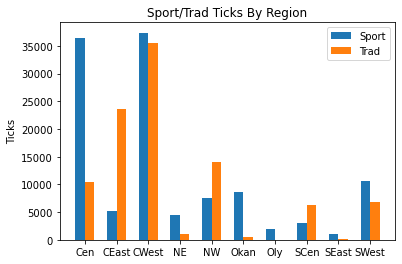

In [44]:
N = 10
width = 0.3     
ind = np.arange(N)
plt.bar(ind, sport_ticks.iloc[: , -1], width, label='Sport')
plt.bar(ind + width, trad_ticks.iloc[: , -1], width,
    label='Trad')

plt.ylabel('Ticks')
plt.title('Sport/Trad Ticks By Region')

plt.xticks(ind + width / 2, ('Cen', 'CEast', 'CWest', 'NE', 'NW','Okan','Oly','SCen','SEast','SWest'))
plt.legend(loc='best')
plt.show()

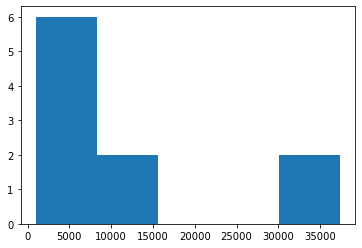

In [35]:
# plt.bar(ind, sport_ticks, width, label='Men')
plt.hist(sport_ticks.iloc[: , -1], 5)
plt.show()

<AxesSubplot:ylabel='region'>

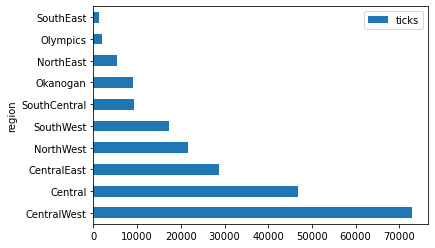

In [12]:
#what regions are most popular? sum of ticks by region
df_flat = df.groupby(['region'])['ticks'].sum().reset_index()

df_flat.sort_values(['ticks'], ascending=False).head(10).plot(kind='barh', y='ticks', x='region')

<AxesSubplot:ylabel='region'>

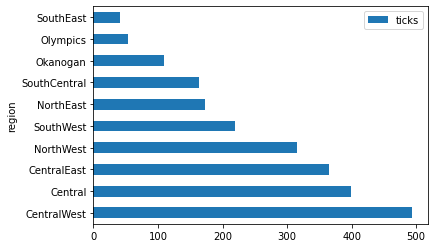

In [54]:
df_flat1 = df.groupby(['region'])['ticks'].count().reset_index()

df_flat1.sort_values(['ticks'], ascending=False).head(10).plot(kind='barh', y='ticks', x='region')

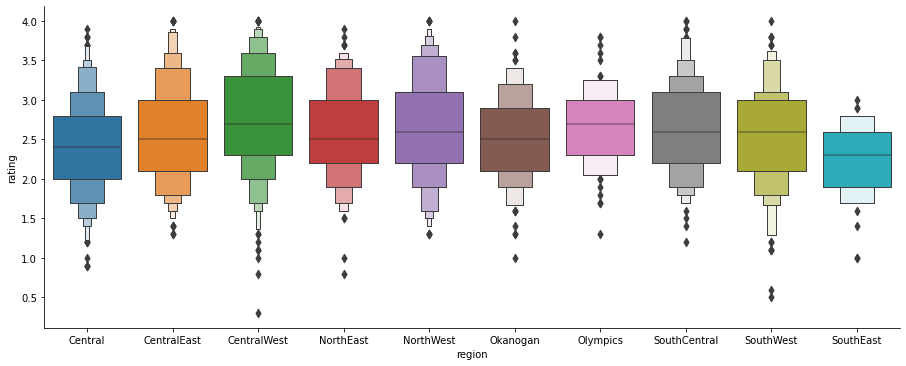

In [13]:
#Looks like central west, central, and central east are the most popular.

sns.catplot(data = df, x = 'region', y = 'rating', kind = 'boxen', aspect = 2.5)


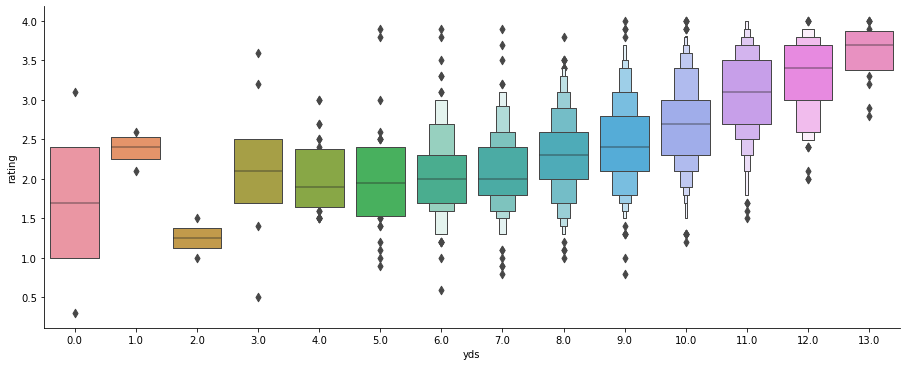

In [14]:
#looks like the median rating for climbs increase with their difficulty 
sns.catplot(data = df, x = 'yds', y = 'rating', kind = 'boxen', aspect = 2.5)

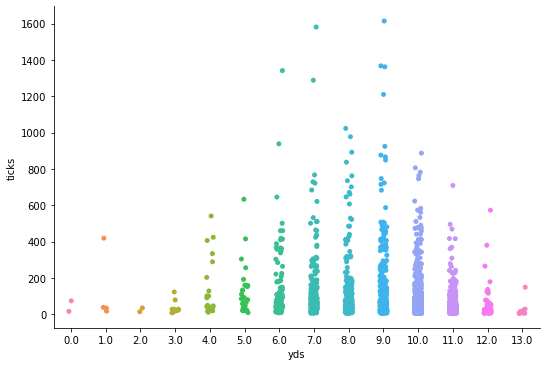

In [15]:
sns.catplot(data = df, x = 'yds', y = 'ticks', aspect = 1.5)

<AxesSubplot:xlabel='yds', ylabel='ticks'>

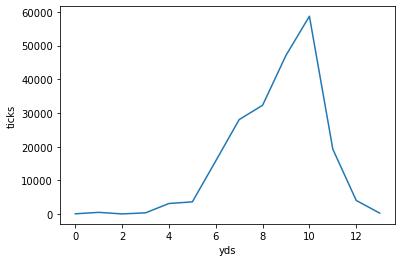

In [47]:
#5.6 to 5.10 ish appear to be the most trafficked grades
sns.lineplot(data = df_yds_sum, x = 'yds', y = 'ticks', )

sns.catplot(data = df, x = 'yds', y = 'region')

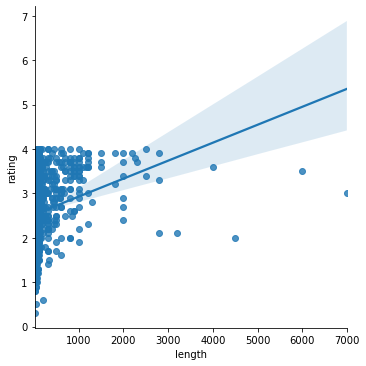

In [18]:
sns.lmplot(data = df, x = 'length', y = 'rating')